<a href="https://colab.research.google.com/github/vermanaman419-prog/BMW_Cars_sales_Analysis/blob/main/BMW_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 BMW Sales Analysis (2010–2024)


# Import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data


In [ ]:
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")


# Basic Overview


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-N

# Cleaning Data


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Standardize column names


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


# Convert year or date columns if present


In [ ]:
if 'year' in df.columns:
    df['year'] = df['year'].astype(int)
elif 'date' in df.columns:
    df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
df.to_csv("BMW_Sales_Cleaned.csv", index=False)


#**visualizations**

#  1️⃣ Popularity of Fuel Type Over Time


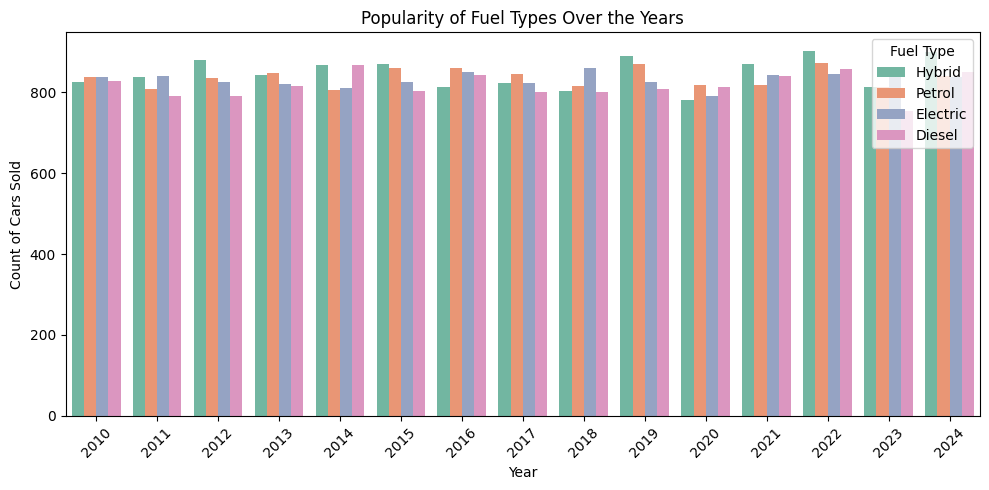

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year', hue='fuel_type', palette='Set2')
plt.title("Popularity of Fuel Types Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Cars Sold")
plt.legend(title="Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Model Popularity by Region

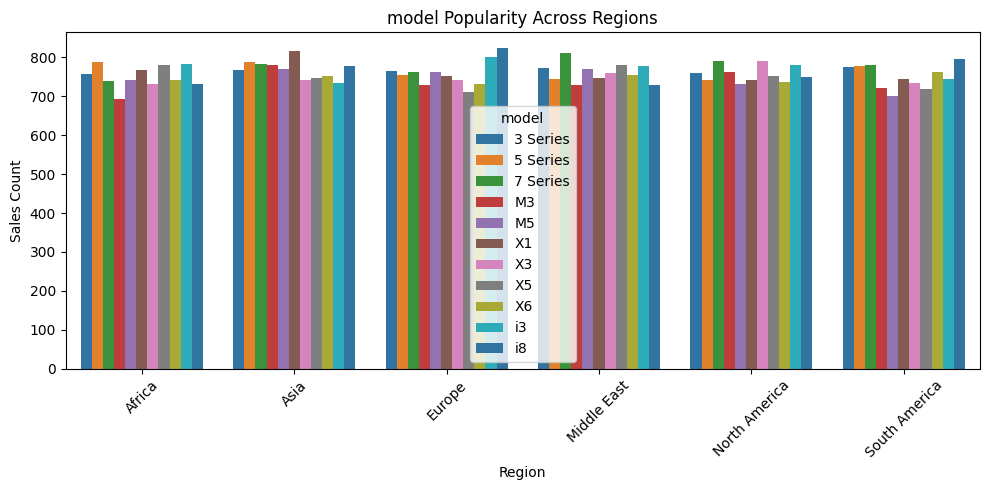

In [ ]:
if 'region' in df.columns:
    plt.figure(figsize=(10,5))
    brand_region = df.groupby(['region', 'model']).size().reset_index(name='count')
    sns.barplot(data=brand_region, x='region', y='count', hue='model', palette='tab10')
    plt.title("model Popularity Across Regions")
    plt.xlabel("Region")
    plt.ylabel("Sales Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#3️⃣ Top 5 Car Models

/tmp/ipython-input-1063792271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_models.values, y=top5_models.index, palette='coolwarm')


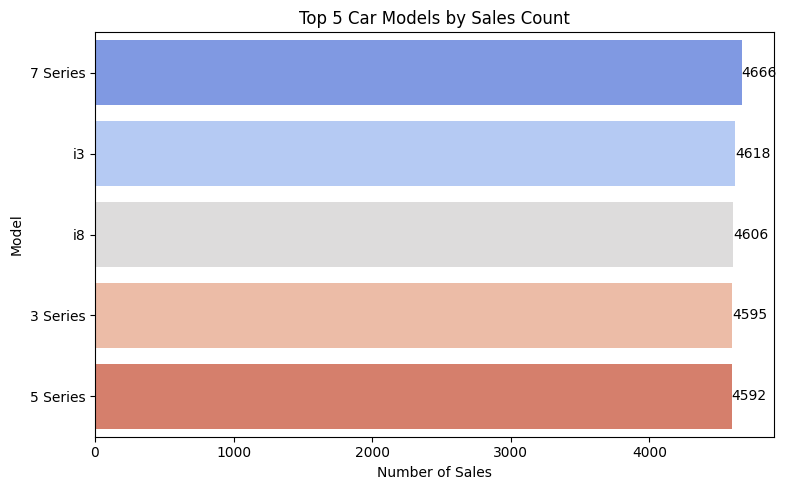

In [ ]:
top5_models = df['model'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top5_models.values, y=top5_models.index, palette='coolwarm')
plt.title("Top 5 Car Models by Sales Count")
plt.xlabel("Number of Sales")
plt.ylabel("Model")
for i, val in enumerate(top5_models.values):
    plt.text(val, i, str(val), va='center')
plt.tight_layout()
plt.show()

#4️⃣Top 3 Performing Colours

/tmp/ipython-input-511973511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.values, y=top_colors.index, palette=bar_colors)


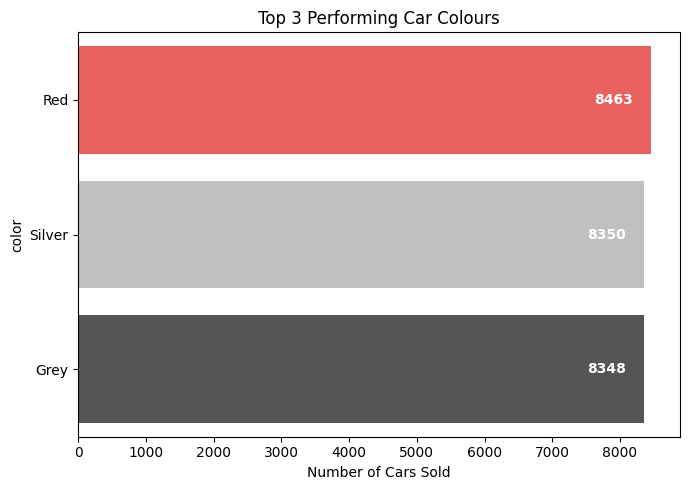

In [ ]:

if 'color' in df.columns:
    top_colors = df['color'].value_counts().head(3)

    # Define custom colors based on the color names
    color_map = {
        'Red': '#FF4C4C',      # bright red
        'Silver': '#C0C0C0',   # metallic silver
        'Grey': '#555555',     # dark grey
        'Gray': '#555555'      # handle both spellings
    }

    bar_colors = [color_map.get(c, 'lightblue') for c in top_colors.index]

    plt.figure(figsize=(7,5))
    sns.barplot(x=top_colors.values, y=top_colors.index, palette=bar_colors)
    plt.title("Top 3 Performing Car Colours")
    plt.xlabel("Number of Cars Sold")

    # Add numeric labels inside bars
    for i, val in enumerate(top_colors.values):
        plt.text(val - (val * 0.1), i, str(val), va='center', color='white', fontweight='bold')

    plt.tight_layout()
    plt.show()


📊 Conclusions

**1**. **Fuel** **Type** **Trends**:
Over the years, petrol vehicles remain dominant, but electric vehicle (EV) sales have shown steady growth — reflecting the global shift toward sustainable mobility.

**2**. **Regional** **Popularity**:
Europe and North America emerged as BMW’s strongest markets, with consistent sales across multiple years. Developing regions are slowly gaining traction as awareness and infrastructure improve.

**3**. **Top** **Car** **Models**:
Models like BMW 3 Series and 5 Series continue to perform strongly, indicating customer preference for a balance of performance and luxury.

**4**. **Color** **Preferences**:
Red, Silver, and Grey are the top-performing colors, showing customer inclination toward bold yet classic choices. This insight can guide production and marketing decisions.

**5**. **Mileage** **Efficiency**:
Among all models, mid-sized sedans offer the best mileage performance, making them a reliable and economical choice for a wide consumer base.